In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt   
from warnings import filterwarnings
filterwarnings('ignore')
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
from sklearn.linear_model import Lasso

In [6]:
lasso_model = Lasso(alpha = 0.1). fit(X_train, y_train)
lasso_model

Lasso(alpha=0.1)

In [7]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

Text(0, 0.5, 'weights')

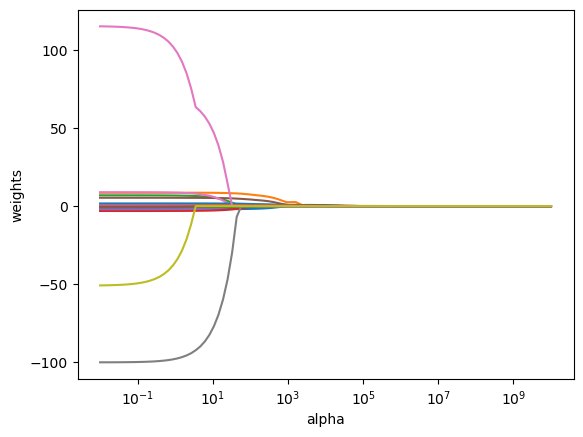

In [14]:
lasso = Lasso()
lambdalar = 10**np. linspace(10,-2,100)*0.5
katsayilar = []
for i in lambdalar:
      lasso.set_params(alpha=i)
      lasso.fit(X_train, y_train)
      katsayilar.append(lasso.coef_)

#görselleştirip bakıcaz
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt. xlabel('alpha')
plt.ylabel( 'weights')


In [15]:
###Tahmin
lasso_model.predict(X_test)
y_pred = lasso_model.predict(X_test)
np.sqrt (mean_squared_error(y_test, y_pred))

356.754527014877

In [21]:
##Model Tuning
from sklearn. linear_model import LassoCV
lasso_cv_model = LassoCV(alphas = None,
                         cv = 10,
                         max_iter = 10000)
lasso_cv_model. fit(X_train,y_train)
lasso_cv_model.alpha_

563.4670501833853

In [22]:
lasso_tuned = Lasso (alpha = lasso_cv_model.alpha_)
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=563.4670501833853)

In [23]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error (y_test, y_pred))

373.5957225069794